In [71]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [24]:
df = pd.read_csv('/Users/mr.tian/Desktop/adult.csv')

In [45]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [26]:
df = df.replace('?', np.nan)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   32561 non-null  int64
 1   fnlwgt                                32561 non-null  int64
 2   education.num                         32561 non-null  int64
 3   capital.gain                          32561 non-null  int64
 4   capital.loss                          32561 non-null  int64
 5   hours.per.week                        32561 non-null  int64
 6   education_Bachelors                   32561 non-null  int64
 7   education_HS-grad                     32561 non-null  int64
 8   education_Masters                     32561 non-null  int64
 9   education_Other                       32561 non-null  int64
 10  education_Some-college                32561 non-null  int64
 11  occupation_Craft-repair               325

In [33]:
col = ['workclass', 'occupation', 'native.country']

In [43]:
df[col] = df[col].fillna(df[col].mode().iloc[0])

In [49]:
for cols in df.columns:
    print(df[cols].name, df[cols].nunique())

age 73
workclass 8
fnlwgt 21648
education 16
education.num 16
marital.status 7
occupation 14
relationship 6
race 5
sex 2
capital.gain 119
capital.loss 92
hours.per.week 94
native.country 41
income 2


In [54]:
def topk_onehot(df, col, k, prefix=None):
    top_k = df[col].value_counts().nlargest(k).index

    clean_col = col + '_clean'
    df[clean_col] = df[col].where(df[col].isin(top_k), 'Other')
    df = pd.get_dummies(df, columns=[clean_col], prefix=prefix or col, drop_first=True, dtype=int)
    return df

In [56]:
df = topk_onehot(df, col='education', k=5, prefix='education')
df = topk_onehot(df, col='occupation', k=5)
df = topk_onehot(df, col='native.country', k=10, prefix='native.country')

In [59]:
low_col = ['workclass', 'marital.status', 'relationship', 'race', 'sex', 'income']

df = pd.get_dummies(df, columns=low_col, drop_first=True, dtype=int)

In [61]:
df = df.drop(columns=['education', 'occupation', 'native.country'], axis=1)

In [63]:
X = df.drop(columns='income_>50K', axis=1)
y = df['income_>50K']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
clf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
proba = clf.predict_proba(X_test)[:, 1]
print("accuracy: ", accuracy_score(y_test, pred))
print("roc_auc: ", roc_auc_score(y_test, proba))

accuracy:  0.8476892369107938
roc_auc:  0.89795743053972


In [76]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

acc_scores = cross_val_score(
    clf,
    X,
    y,
    cv=skf,
    scoring='accuracy'
)

roc_score = cross_val_score(
    clf,
    X,
    y,
    cv=skf,
    scoring='roc_auc'
)

print("accuracy_score: ", acc_scores)
print("roc_auc_score: ", roc_score)

accuracy_score:  [0.84738216 0.84520885 0.84858722 0.85257985 0.85396192]
roc_auc_score:  [0.89848457 0.89529671 0.89906926 0.90216909 0.90164433]


In [81]:
imp = pd.Series(clf.feature_importances_, index=X.columns)
imp.sort_values(ascending=False).head(15)

age                                  0.161860
fnlwgt                               0.153790
marital.status_Married-civ-spouse    0.110994
hours.per.week                       0.084081
capital.gain                         0.070512
education.num                        0.065558
marital.status_Never-married         0.059957
sex_Male                             0.024512
capital.loss                         0.022034
relationship_Not-in-family           0.021018
relationship_Own-child               0.017465
relationship_Unmarried               0.012674
workclass_Private                    0.011918
occupation_Other                     0.010840
occupation_Other                     0.010688
dtype: float64

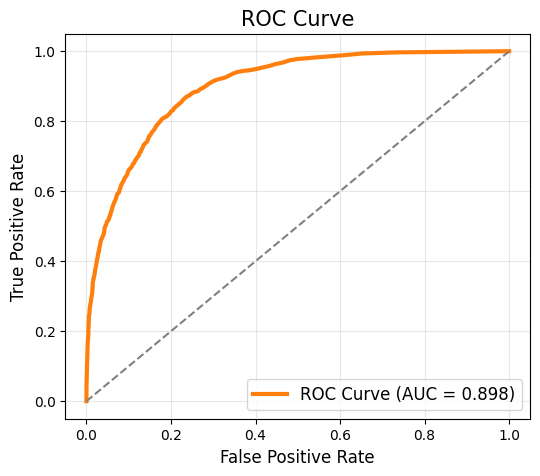

In [78]:
y_score = clf.predict_proba(X_test)[:, 1]

fpr, tpr, _=roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='#FF7F0E', linewidth=3,
         label=f'ROC Curve (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1.5)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve', fontsize=15)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.show()

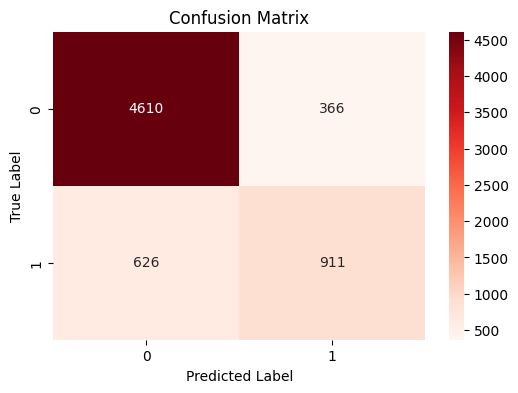

In [80]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [82]:
for t in [0.3, 0.4, 0.5]:
    pred_t = (y_score >= t).astype(int)
    cm = confusion_matrix(y_test, pred_t)
    print(f"threshold={t}\n", cm)

threshold=0.3
 [[4203  773]
 [ 355 1182]]
threshold=0.4
 [[4434  542]
 [ 499 1038]]
threshold=0.5
 [[4600  376]
 [ 623  914]]
